# Карты

### Проблема:
Изначально были использованы карты [slazav](http://slazav.xyz/maps/index.htm#podm_txt). Они были созданы для проведения ММБ и поэтому наиболее детально отражают особенности местности. Однако имеется ряд проблем:   
- Они существуют только для Московской области
- Они используют неизвестный формат .mp который пришлось парсить вручную.
- Разделены на фрагменты площадью во много кв. километров, файлы размером по 6 мб. Это значительно увеличивает время работы алгоритма. Более того, в редких случаях появляется проблема подключения дополнительных файлов такого же размера, если исследуемая область находится на стыке фрагментов, что увеличивает время работы в 2-3 раза.  
- Карты нужно где-то хранить

### Решение:
Использование карт [OpenStreetMap](https://www.openstreetmap.org/). В них также имеются данные по дорогам, типам покрытия и поверхностей и многое другое. Есть возможность [сохранения](https://wiki.openstreetmap.org/wiki/Downloading_data) любых фрагментов карт с использованием [OSM API](https://wiki.openstreetmap.org/wiki/API_v0.6). Область скачивания выбирается вручную.  
1) Это решает проблему обработки больших файлов, так как для каждого маршрута можно скачать файл конкретной небольшой области.  
2) Это позволяет строить маршруту по всему миру без ограничений, без изменений алгоритма.  
3) Open Source, обилие документации, примеров, постоянные обновления данных, поддержка всеми форматами и приложениями, поддержка всех форматов и приложений, быстрый рост.  

---
Пример: скачивание карты МГУ.

In [17]:
#Границы задаются в зависимости от области
min_long = 37.52408
min_lat = 55.70015
max_long = 37.54093
max_lat = 55.70514
addr = "\"https://api.openstreetmap.org/api/0.6/map?bbox=" \
    + str(min_long)  + ',' + str(min_lat) + ',' + str(max_long) + ',' + str(max_lat) + '"'

#Скачивание возможно из командной строки с помощью curl / wget
!curl -o test_map.osm $addr
#!wget -O test_map.osm $addr

import shutil
import sys
with open('test_map.osm', encoding='utf-8') as file:
    shutil.copyfileobj(file, sys.stdout)

<?xml version="1.0" encoding="UTF-8"?>
<osm version="0.6" generator="CGImap 0.8.3 (2110038 spike-06.openstreetmap.org)" copyright="OpenStreetMap and contributors" attribution="http://www.openstreetmap.org/copyright" license="http://opendatacommons.org/licenses/odbl/1-0/">
 <bounds minlat="55.7001500" minlon="37.5240800" maxlat="55.7051400" maxlon="37.5409300"/>
 <node id="87235758" visible="true" version="21" changeset="35460943" timestamp="2015-11-20T12:56:16Z" user="Владимир К" uid="2853561" lat="55.7004621" lon="37.5457517">
  <tag k="highway" v="traffic_signals"/>
 </node>
 <node id="112564575" visible="true" version="28" changeset="19993267" timestamp="2014-01-14T15:41:15Z" user="Антін Сартенченко" uid="571410" lat="55.7041612" lon="37.5392878"/>
 <node id="112565910" visible="true" version="22" changeset="19993267" timestamp="2014-01-14T15:41:15Z" user="Антін Сартенченко" uid="571410" lat="55.7022949" lon="37.5359050"/>
 <node id="112566336" visible="true" version="27" changeset=

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2126k    0 2126k    0     0  2370k      0 --:--:-- --:--:-- --:--:-- 2367k


### Формат [OSM](https://wiki.openstreetmap.org/wiki/OSM_XML)
- XML формат
- Наличие готовых библиотек для парсинга ([pyrosm](https://pyrosm.readthedocs.io/en/latest/), [lmposm](https://imposm.org/docs/imposm3/latest/))  
- Наличие программ для конвертации в другие форматы

---
# Вывод данных

### Проблема:
Выбор формата для выходных данных (построенного маршрута) изначально пал на [GPX](https://ru.wikipedia.org/wiki/GPX). Обусловлено это тем, что его принимают практически все системы навигации([nakarte](https://nakarte.me/), [AllTrails](https://www.alltrails.com/), Garmin BaseCamp, SASplanet). Однако имеется ряд проблем:  
- Как отображать полученный результат без необходимости загружать его в одну из систем?  
- Как добавить в построенный маршрут информацию о высоте?  
- Как фильтровать маршрут?  
- Как парсить существующие GPX файлы?

### Решение:
Были найдены несколько алгоритмов и библиотек для работы с файлами GPX:  
1) [gpxpy](https://pypi.org/project/gpxpy/) - парсер  
2) [srtm.py](https://github.com/tkrajina/srtm.py) - добавление недостающей информации о высоте на основе геоположения  
3) [rdp](https://pypi.org/project/rdp/) - сглаживание алгоритмом Рамера-Дугласа-Пекера, позволяет уменьшить количество точек трэка  
4) [pykalman](https://pykalman.github.io/) - сглаживание фильтром Кальмана, позволяет избавиться от недостоверных перепадов высот  
Стоит отметить, что данные алгоритмы подходят в основном для обработки входных данных о маршрутах, поступающих в формате GPX.  
Для визуализации полученного результата идеальной находкой является [mplleaflet](https://github.com/jwass/mplleaflet), позволяющая выводить графики на карту [Leaflet](https://leafletjs.com/). По умолчанию используются карты OpenStreetMap. Соответствие карт это большой плюс, так как гарантирует отсутствие несоответствий. Карта полностью интерактивная, она может быть добавлена на любой сайт.

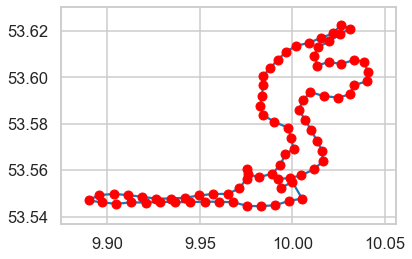

In [31]:
import gpxpy
import mplleaflet
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0.1
plt.rcParams['axes.ymargin'] = 0.1
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

with open('hh_marathon.gpx') as fh:
    gpx_file = gpxpy.parse(fh)

segment = gpx_file.tracks[0].segments[0]
coords = pd.DataFrame([{'lat': p.latitude, 'lon': p.longitude} for p in segment.points])
plot_coords = coords.iloc[::150]

fig = plt.figure()
plt.plot(plot_coords['lon'].values, plot_coords['lat'].values);
plt.plot(plot_coords['lon'].values, plot_coords['lat'].values, 'ro');

In [43]:
mplleaflet.display(fig=fig)

---
# Алгоритм

### Используемое в данный момент
google  
graphhopper - a*, CH  
gamedev